<a href="https://colab.research.google.com/github/ikrahmi/Artificial-Intelligence/blob/main/Gaussian_naive_bayes_using_dataset_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/Artificial Intelligence/diabetes.csv'

load dataset and read dataset to pandas dataframe

In [ ]:
pima = pd.read_csv(dataset)   # read csv file
pima.head(10)                 # tampilkan 10 baris pertama

In [ ]:
len(pima)   # cek panjang data

768

Visualize class distribution

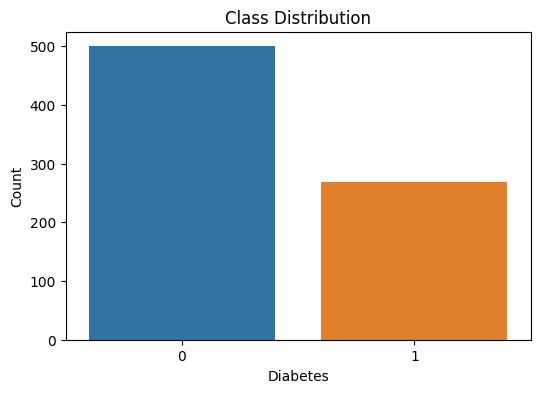

In [ ]:
df = pd.DataFrame(pima)
class_counts = df['Outcome'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x = class_counts.index, y = class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

**Selecting Feature**

Divide/split the given columns into two types of variables: dependent variable (target) and independent variable (feature)

In [ ]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = pima[feature_cols]    # feature variable
y = pima.Outcome          # target variable

In [ ]:
x

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Normalization with MinMaxScalar

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
# Jika menggunakan StandarScaler
# from sklearn.preprocessing import StandarScaler
# scaler = StandarScaler()
# scaler.fit(x)
# x = scaler.transform(x)


In [ ]:
x

Splitting data into traininng set (80%) and test set (20%)

In [ ]:
# from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [ ]:
x_test

**Prediction Model Development**

first, import logistic regression module and create a logistic regression classifier object using LogisticRegression() function. Then, fit your model on the training set using fit() function and perform prediction using predict() function.

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
len(x_test)

154

accuracy:0.79
Classification report
              precision    recall  f1-score   support

          No       0.84      0.87      0.85       107
         Yes       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



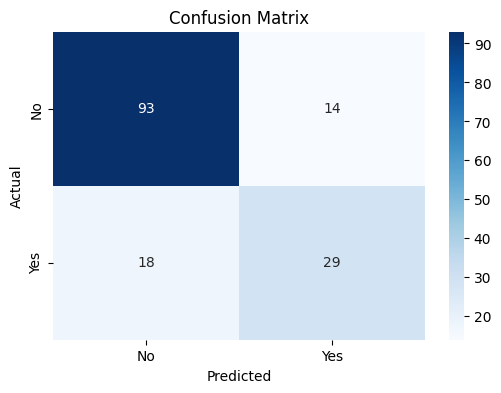

In [ ]:
from sklearn.metrics import classification_report
y_pred = gnb.predict(x_test)                # make prediction

accuracy = accuracy_score(y_test,y_pred)    # calculate accuracy
print(f'accuracy:{accuracy:.2f}')

cm = confusion_matrix(y_test,y_pred)        # make confusion matrix
print(f'Classification report')
print(classification_report(y_test,y_pred, target_names =['No','Yes']))

plt.figure(figsize=(6,4))                   # visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues', xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()